In [1]:
%run setup.py

In [2]:
# mw_streams = galstreams.MWStreams(verbose=False)
plot_density_healpy.plot_pretty(figsize=(12,12))

In [3]:
def apwnorm(x, min=None, max=None):
    if min is None:
        min = np.nanmin(x[~np.isinf(x)])
    if max is None:
        max = np.nanmax(x[~np.isinf(x)])
    return np.clip((x - min) / (max - min), 0, 1)

In [4]:
hpxcube_des, fracdet_des, moduli_des = load_data.load_data(survey='DES_Y6_GOLD', filename='../data/2021/DES_Y6_GOLD_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz')

Reading ../data/2021/DES_Y6_GOLD_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz...


In [5]:
hp.npix2nside(hpxcube_des.shape[0])

512

In [6]:
moduli_des

array([15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. ,
       16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1,
       17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. , 18.1, 18.2,
       18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2, 19.3,
       19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1])

In [7]:
reload(load_data)
# hpxcube_delve, fracdet_delve, moduli_delve = load_data.load_hpxcube('../data/2021/DELVE_iso_hpxcube_z0.0001_a12.0_gmax24_gmin16.fits.gz')
hpxcube_bass, fracdet_bass, moduli_bass = load_data.load_data(survey='BASS_DR9', filename='../data/2021/BASS_DR9_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz')
hpxcube_decals, fracdet_decals, moduli_decals = load_data.load_data(survey='DECaLS_DR9', filename='../data/2021/DECaLS_DR9_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz')
hpxcube_des, fracdet_des, moduli_des = load_data.load_data(survey='DES_Y6_GOLD', filename='../data/2021/DES_Y6_GOLD_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz')
hpxcube_delve1, fracdet_des, moduli_des = load_data.load_data(survey='DELVE1', filename='../data/2021/DELVE_R1_iso_hpxcube_z0.0001_a12.0_gmax22.0_gmin16_sg003_gi.fits.gz')
hpxcube_delve2, fracdet_des, moduli_des = load_data.load_data(survey='DELVE2', filename='../data/2021/DELVE_R2_iso_hpxcube_z0.0001_a12.0_gmax22.0_gmin16_sg003_gi.fits.gz')

Reading ../data/2021/BASS_DR9_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz...
Reading ../data/2021/DECaLS_DR9_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz...
Reading ../data/2021/DES_Y6_GOLD_iso_hpxcube_z0.0001_a12.0_gmax23.5_gmin16.fits.gz...
Reading ../data/2021/DELVE_R1_iso_hpxcube_z0.0001_a12.0_gmax22.0_gmin16_sg003_gi.fits.gz...
Reading ../data/2021/DELVE_R2_iso_hpxcube_z0.0001_a12.0_gmax22.0_gmin16_sg003_gi.fits.gz...


In [8]:
reload(streamlib)
reload(load_data)
reload(plot_density_healpy)
def get_survey_data(survey, use_bkg=True, printing=False, version=0, gmax=23., rerun=False):
    print('Loading %s...' %survey)
    if survey == 'DES':
        hpxcube, fracdet, modulus = load_data.load_data(survey='DES_Y6_GOLD', filename='../data/2021/DES_Y6_GOLD_iso_hpxcube_z0.0001_a12.0_gmax%.1f_gmin16.fits.gz'%gmax)
    elif survey == 'DELVE1':
        hpxcube, fracdet, modulus = load_data.load_data(survey='DELVE_R1', filename='../data/2021/DELVE_R1_iso_hpxcube_z0.0001_a12.0_gmax%.1f_gmin16_sg003_gi.fits.gz'%gmax)
    elif survey == 'DELVE2':
        hpxcube, fracdet, modulus = load_data.load_data(survey='DELVE_R2', filename='../data/2021/DELVE_R2_iso_hpxcube_z0.0001_a12.0_gmax%.1f_gmin16_sg003_gi.fits.gz'%gmax)
    elif survey == 'BASS':
        hpxcube, fracdet, modulus = load_data.load_data(survey='BASS_DR9', filename='../data/2021/BASS_DR9_iso_hpxcube_z0.0001_a12.0_gmax%.1f_gmin16.fits.gz'%gmax)
    elif survey == 'DECaLS':
        hpxcube, fracdet, modulus = load_data.load_data(survey='DECaLS_DR9', filename='../data/2021/DECaLS_DR9_iso_hpxcube_z0.0001_a12.0_gmax%.1f_gmin16.fits.gz'%gmax)
        
    ###
    
    if np.all(fracdet) == None:
        print('No fracdet')
        fracdet = np.zeros_like(hpxcube[:, 0])
        fracdet[np.where(hpxcube[:, 0] > 0)] = 1
        
    ###

    slices = [(26, 50),
              (15, 26),
              (0, 15)]

    slice_str = '_'.join(['{}-{}'.format(x, y) for x, y in slices])
    dist = plot_density_healpy.mod2dist(modulus)
    for x, y in slices:
        print(dist[x], dist[y])

    ###

    proj = plot_density_healpy.get_ortho_proj(ends=[[5, -5], [15, -5]], half_sky=False)
    nside = hp.npix2nside(len(hpxcube[:, 0]))
    func = lambda x, y, z: hp.vec2pix(nside, x, y, z)

    ###

    try:
        if rerun:
            alskjf
        data_stack = np.load('../data/data_stack_%s_v%i_g%.1f_bkg%i.npy' % (survey.lower(), version, gmax, use_bkg))
#         data_stack = data_stack.T

    except:
        data_stack = []

        for i in range(np.min(slices), np.max(slices)):
            mu = modulus[i]
            if printing:
                print('%.1f' %mu)

            data_masked = plot_density_healpy.prepare_data(mu, hpxcube, modulus, None, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=True, globs_dwarfs=True, lmc=True)
            data = plot_density_healpy.prepare_data(mu, hpxcube, modulus, None, sigma=0.2, fracmin=0.5, clip=100, all_off=True, lmc=False, milky_way=False, sgr=False,
                                                    globulars=False, dwarfs=False, galaxies=False, plane=False, bmax=25, center=False, globs_dwarfs=False, acs=False)
            if use_bkg:
                bkg = plot_density_healpy.fit_bkg(data_masked, proj, sigma=0.2)
                bkg.mask = data.mask
            else:
                bkg = 0
            data_stack.append(data - bkg)

        data_stack = np.asarray(data_stack)

        np.save('../data/data_stack_%s_v%i_g%.1f_bkg%i.npy' % (survey.lower(), version, gmax, use_bkg), data_stack.T)

    ###
    
    if data_stack.shape[1] > data_stack.shape[0]:
        data_stack = data_stack.T

    mask = streamlib.make_mask(nside=512, all_off=True, lmc=False, sgr=False, acs=False, globs_dwarfs=False, dwarfs=False, globulars=False, milky_way=False)
    mask |= fracdet < 1.0
    mask_stack = np.vstack([mask]*data_stack.shape[1]).T

    data_stack_masked = np.ma.array(data_stack, mask=mask_stack)
    data_stack_masked.fill_value = np.nan

    ###

    stacks = [np.sum(data_stack_masked[:, x:y], axis=1) / (y - x) for x, y in slices]
    for s in stacks:
        s.fill_value = np.nan

    rgb = stacks
    for i in range(3):
        X = stacks[i]
        rgb[i] = apwnorm(rgb[i], min=np.percentile(rgb[i], 1), max=np.percentile(rgb[i], 99))
        rgb[i][X == 0] = 0.

    return rgb, data_stack_masked

In [9]:
version = 11
rgb_delve1, data_delve1 = get_survey_data('DELVE1', use_bkg=0, version=version, gmax=22.0)
rgb_delve2, data_delve2 = get_survey_data('DELVE2', use_bkg=0, version=version, gmax=22.0)

version=10
rgb_des, data_des = get_survey_data('DES', use_bkg=0, version=version, gmax=24.0)
rgb_decals, data_decals = get_survey_data('DECaLS', use_bkg=0, version=version, gmax=23.0)
rgb_bass, data_bass = get_survey_data('BASS', use_bkg=0, version=version, gmax=23.0)

Loading DELVE1...
Reading ../data/2021/DELVE_R1_iso_hpxcube_z0.0001_a12.0_gmax22.0_gmin16_sg003_gi.fits.gz...
33.11311214825894 99.99999999999919
19.952623149688748 33.11311214825894
10.0 19.952623149688748
10.0 -5.019001817489642 0.008077670133951253
Loading DELVE2...
Reading ../data/2021/DELVE_R2_iso_hpxcube_z0.0001_a12.0_gmax22.0_gmin16_sg003_gi.fits.gz...
33.11311214825894 99.99999999999919
19.952623149688748 33.11311214825894
10.0 19.952623149688748
10.0 -5.019001817489642 -0.003579480817638
Loading DES...
Reading ../data/2021/DES_Y6_GOLD_iso_hpxcube_z0.0001_a12.0_gmax24.0_gmin16.fits.gz...
33.11311214825894 99.99999999999919
19.952623149688748 33.11311214825894
10.0 19.952623149688748
10.0 -5.019001817489642 -0.005713875260687713
Loading DECaLS...
Reading ../data/2021/DECaLS_DR9_iso_hpxcube_z0.0001_a12.0_gmax23.0_gmin16.fits.gz...
33.11311214825894 99.99999999999919
19.952623149688748 33.11311214825894
10.0 19.952623149688748
10.0 -5.019001817489642 0.017054956681859607
Loading B

In [10]:
# data_des = hpxcube_des
# data_delve1 = hpxcube_delve1
# data_delve2 = hpxcube_delve2
# data_decals = hpxcube_decals
# data_bass = hpxcube_bass

10.0 -5.019001817489642 -0.016640441986943085


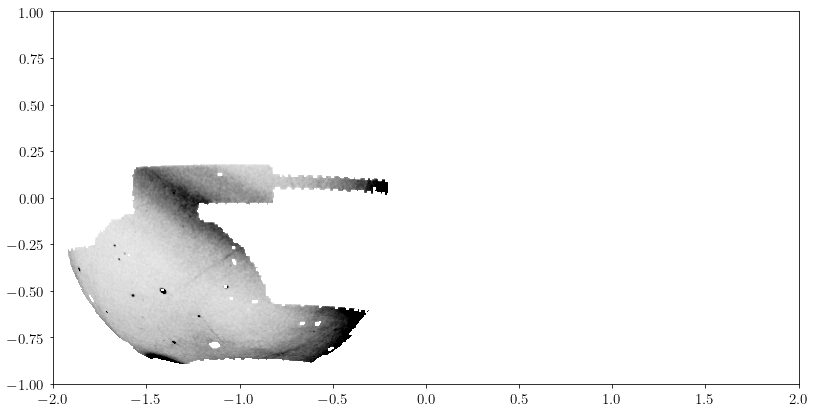

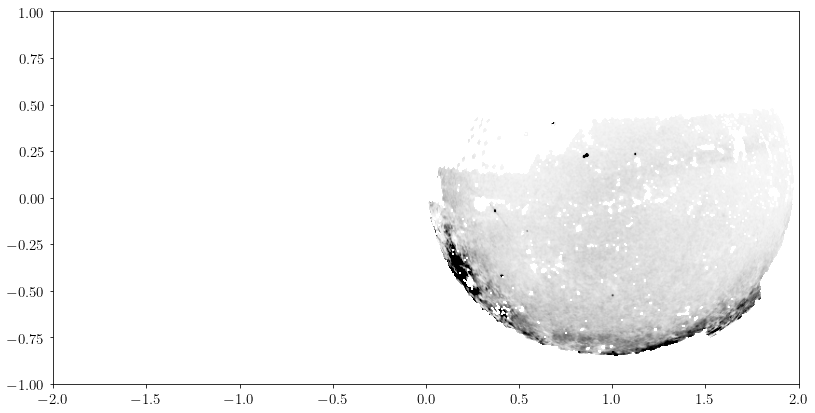

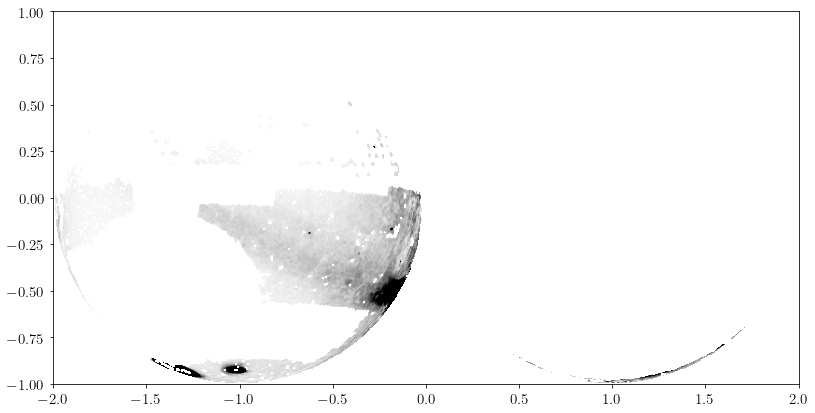

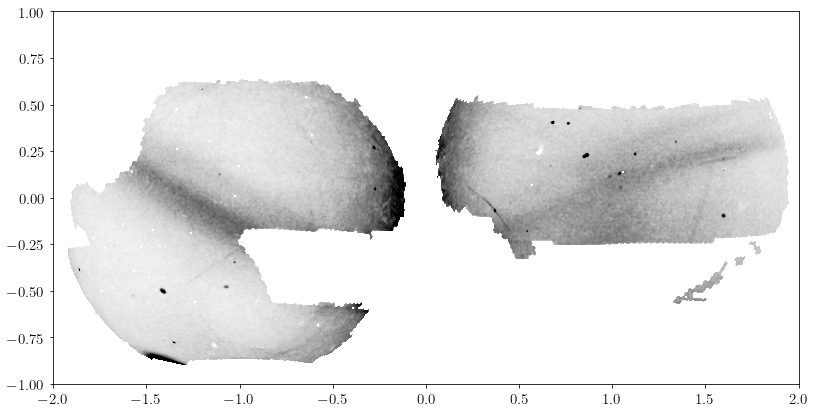

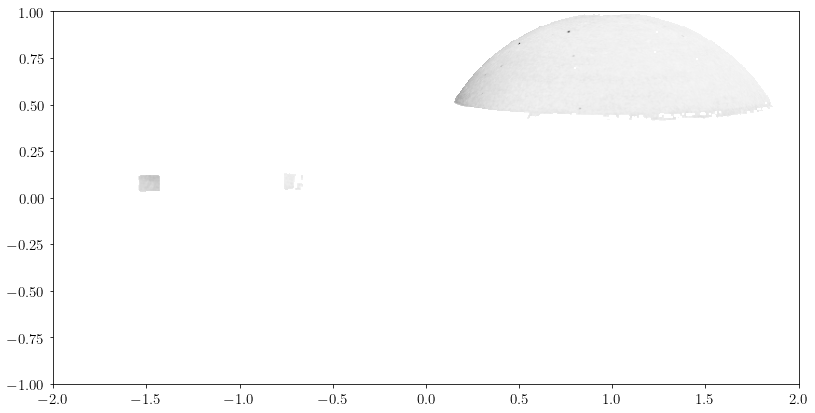

In [11]:
proj = plot_density_healpy.get_ortho_proj(ends=[[5,-5],[15,-5]], half_sky=False)
ax, im = plot_density_healpy.plot_proj(proj, data_des[:,10], vmin=0, vmax=20)
ax, im = plot_density_healpy.plot_proj(proj, data_delve1[:,10], vmin=0, vmax=20)
# plot_density_healpy.plot_stream_footprints(ax, proj, 16.9, dmu=5.0)
ax, im = plot_density_healpy.plot_proj(proj, data_delve2[:,10], vmin=0, vmax=20)
ax, im = plot_density_healpy.plot_proj(proj, data_decals[:,10], vmin=0, vmax=20)
ax, im = plot_density_healpy.plot_proj(proj, data_bass[:,10], vmin=0, vmax=50)

In [12]:
hpxcube_merged = np.zeros_like(hpxcube_des[:,10])
hpxcube_merged[hpxcube_bass[:,10] != 0] = hpxcube_bass[:,10][hpxcube_bass[:,10] != 0]
hpxcube_merged[hpxcube_decals[:,10] != 0] = hpxcube_decals[:,10][hpxcube_decals[:,10] != 0]
hpxcube_merged[hpxcube_delve1[:,10] != 0] = hpxcube_delve1[:,10][hpxcube_delve1[:,10] != 0] 
hpxcube_merged[hpxcube_delve2[:,10] != 0] = hpxcube_delve2[:,10][hpxcube_delve2[:,10] != 0] 
hpxcube_merged[hpxcube_des[:,10] != 0] = hpxcube_des[:,10][hpxcube_des[:,10] != 0] 

In [13]:
data_merged = np.zeros_like(data_des[:,10])
data_merged[~data_bass[:,10].mask] = data_bass[:,10][~data_bass[:,10].mask]
data_merged[~data_delve1[:,10].mask] = data_delve1[:,10][~data_delve1[:,10].mask] 
data_merged[~data_delve2[:,10].mask] = data_delve2[:,10][~data_delve2[:,10].mask] 
data_merged[~data_decals[:,10].mask] = data_decals[:,10][~data_decals[:,10].mask]
data_merged[~data_des[:,10].mask] = data_des[:,10][~data_des[:,10].mask] 

9.999999999999998 -25.08377124921552 0.001051880468634623


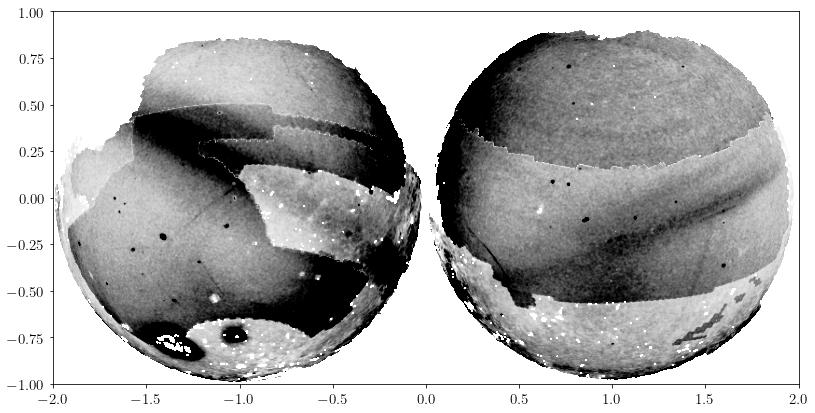

In [14]:
proj = plot_density_healpy.get_ortho_proj(ends=[[5,-25],[15,-25]], half_sky=False)
ax, im = plot_density_healpy.plot_proj(proj, data_merged, vmin=0, vmax=12)

10.0 5.019001817489642 0.013090627302052266


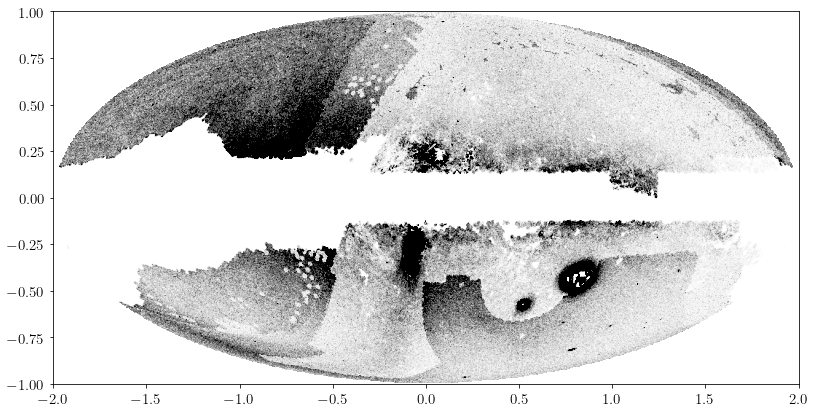

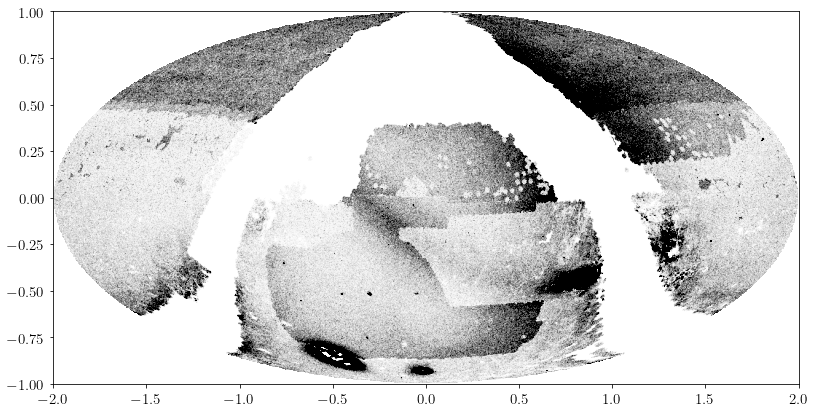

In [15]:
proj = hp.projector.MollweideProj(xsize=1024, 
                                  rot=[266.4, -28.9, 59.])
ax, im = plot_density_healpy.plot_proj(proj, np.ma.getdata(hpxcube_merged), vmin=0, vmax=20)

proj = plot_density_healpy.get_mollweide_proj(ends=[[5,5],[15,5]])
ax, im = plot_density_healpy.plot_proj(proj, np.ma.getdata(hpxcube_merged), vmin=0, vmax=20)

# plot_density.plot_streams(smap, mu, 50, coords=coords, coord_stream=stream)

In [16]:
# data_merged = np.zeros_like(data_des[:,10])
# data_merged[~data_bass[:,10].mask] = data_bass[:,10][~data_bass[:,10].mask]
# data_merged[~data_delve1[:,10].mask] = data_delve1[:,10][~data_delve1[:,10].mask] 
# data_merged[~data_delve2[:,10].mask] = data_delve2[:,10][~data_delve2[:,10].mask] 
# data_merged[~data_decals[:,10].mask] = data_decals[:,10][~data_decals[:,10].mask]
# data_merged[~data_des[:,10].mask] = data_des[:,10][~data_des[:,10].mask] 

In [17]:
# FIX LATER

# reload(plot_density_healpy)
# proj = plot_density_healpy.get_ortho_proj(ends=[[5,-35],[15,-35]], half_sky=False)
# ax, im = plot_density_healpy.plot_proj(proj, np.ma.getdata(data_merged), vmin=0, vmax=12)
# plot_density_healpy.plot_stream_footprints(ax, proj, 16.9, dmu=5.0)


##

# ax, im = plot_density_healpy.plot_proj(proj, np.ma.getdata(data_des[:,10]), vmin=0, vmax=20)
# ax, im = plot_density_healpy.plot_proj(proj, np.ma.getdata(data_delve[:,10]), vmin=0, vmax=20, ax=ax)
# ax, im = plot_density_healpy.plot_proj(proj, data_decals[:,10], vmin=0, vmax=20, ax=ax)
# ax, im = plot_density_healpy.plot_proj(proj, data_bass[:,10], vmin=0, vmax=12, ax=ax)

10.0 5.019001817489642 0.00654694340603781


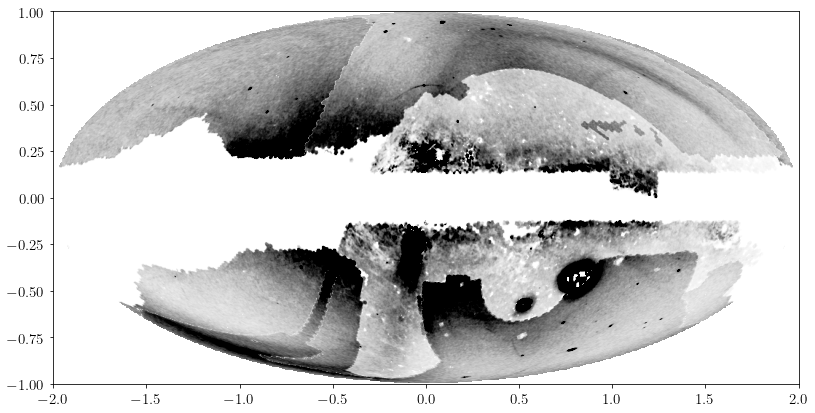

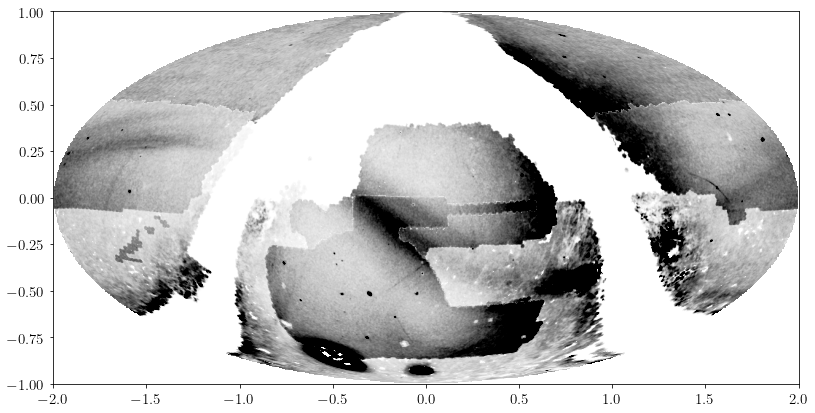

In [18]:
proj = hp.projector.MollweideProj(xsize=1024, 
                                  rot=[266.4, -28.9, 59.])
ax, im = plot_density_healpy.plot_proj(proj, np.ma.getdata(data_merged), vmin=0, vmax=15)

proj = plot_density_healpy.get_mollweide_proj(ends=[[5,5],[15,5]])
ax, im = plot_density_healpy.plot_proj(proj, np.ma.getdata(data_merged), vmin=0, vmax=15)


In [19]:
data_delve = np.zeros_like(data_delve1[:,10])
data_delve[~data_delve1[:,10].mask] = data_delve1[:,10][~data_delve1[:,10].mask] 
data_delve[~data_delve2[:,10].mask] = data_delve2[:,10][~data_delve2[:,10].mask] 


In [20]:
# data_delve = np.zeros_like(data_delve10[:,10])
# data_delve[~data_delve10[:,10].mask] = data_delve10[:,10][~data_delve10[:,10].mask] 
# data_delve[~data_delve20[:,10].mask] = data_delve20[:,10][~data_delve20[:,10].mask] 

# data_delve_bkg = np.zeros_like(data_delve11[:,10])
# data_delve_bkg[~data_delve11[:,10].mask] = data_delve11[:,10][~data_delve11[:,10].mask] 
# data_delve_bkg[~data_delve21[:,10].mask] = data_delve21[:,10][~data_delve21[:,10].mask] 

# data_des_delve = np.zeros_like(data_delve10[:,10])
# data_delve[~data_delve10[:,10].mask] = data_delve10[:,10][~data_delve10[:,10].mask] 
# data_delve[~data_delve20[:,10].mask] = data_delve20[:,10][~data_delve20[:,10].mask] 
# data_des_delve[~data_des240[:,10].mask] = data_des240[:,10][~data_des240[:,10].mask] 

# data_des_delve_bkg = np.zeros_like(data_delve11[:,10])
# data_delve_bkg[~data_delve11[:,10].mask] = data_delve11[:,10][~data_delve11[:,10].mask] 
# data_delve_bkg[~data_delve21[:,10].mask] = data_delve21[:,10][~data_delve21[:,10].mask] 
# data_des_delve_bkg[~data_des241[:,10].mask] = data_des241[:,10][~data_des241[:,10].mask] 


In [21]:
# proj = hp.projector.MollweideProj(xsize=1024, 
#                                   rot=[266.4, -28.9, 59.])
# ax, im = plot_density_healpy.plot_proj(proj, data_des_delve_bkg, vmin=-5, vmax=5)

# proj = plot_density_healpy.get_mollweide_proj(ends=[[5,5],[15,5]])
# ax, im = plot_density_healpy.plot_proj(proj, data_des_delve_bkg, vmin=-5, vmax=5)


In [22]:
# STACK RGB
# rgb_des_delve = np.ma.copy(rgb_delve1)
# rgb_des_delve_bkg = np.ma.copy(rgb_delve1)
rgb_delve = np.ma.copy(rgb_delve1)
# rgb_delve_bkg = np.ma.copy(rgb_delve1)
for i in range(3):
    rgb_delve[i][~data_delve1[:,10].mask] = rgb_delve1[i][~data_delve1[:,10].mask] 
    rgb_delve[i][~data_delve2[:,10].mask] = rgb_delve2[i][~data_delve2[:,10].mask] 
#     rgb_delve_bkg[i][~data_delve11[:,10].mask] = rgb_delve11[i][~data_delve11[:,10].mask] 
#     rgb_delve_bkg[i][~data_delve21[:,10].mask] = rgb_delve21[i][~data_delve21[:,10].mask] 

#     rgb_des_delve[i][~data_delve10[:,10].mask] = rgb_delve10[i][~data_delve10[:,10].mask] 
#     rgb_des_delve[i][~data_delve20[:,10].mask] = rgb_delve20[i][~data_delve20[:,10].mask] 
#     rgb_des_delve[i][~data_des240[:,10].mask] = rgb_des240[i][~data_des240[:,10].mask] 

#     rgb_des_delve_bkg[i][~data_delve11[:,10].mask] = rgb_delve11[i][~data_delve11[:,10].mask] 
#     rgb_des_delve_bkg[i][~data_delve21[:,10].mask] = rgb_delve21[i][~data_delve21[:,10].mask] 
#     rgb_des_delve_bkg[i][~data_des241[:,10].mask] = rgb_des241[i][~data_des241[:,10].mask] 


In [23]:
# proj = hp.projector.MollweideProj(xsize=1024, 
#                                   rot=[266.4, -28.9, 59.])
# ax, im = plot_density_healpy.plot_proj(proj, data_delve_bkg, vmin=-5, vmax=5)

# proj = plot_density_healpy.get_mollweide_proj(ends=[[5,5],[15,5]])
# ax, im = plot_density_healpy.plot_proj(proj, data_delve_bkg, vmin=-5, vmax=5)

# proj = plot_density_healpy.get_ortho_proj(ends=[[5,-5],[15,-5]], half_sky=False)
# ax, im = plot_density_healpy.plot_proj(proj, data_delve_bkg, vmin=-5, vmax=5)
# plot_density_healpy.plot_stream_footprints(ax, proj, 16.9, dmu=5.0)


10.0 5.019001817489642 0.013655585573819571


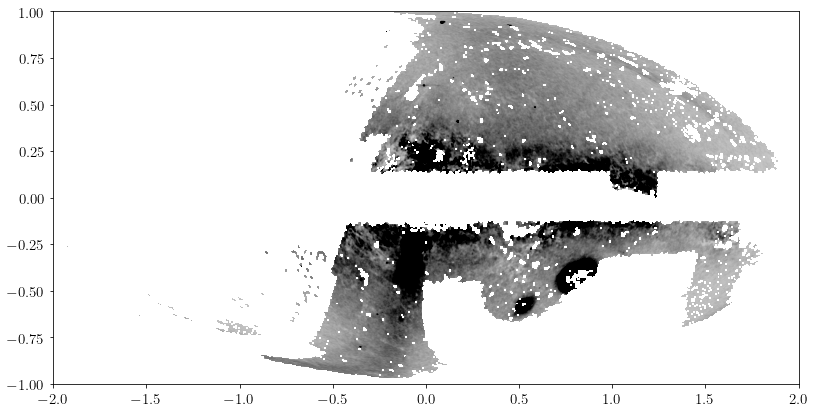

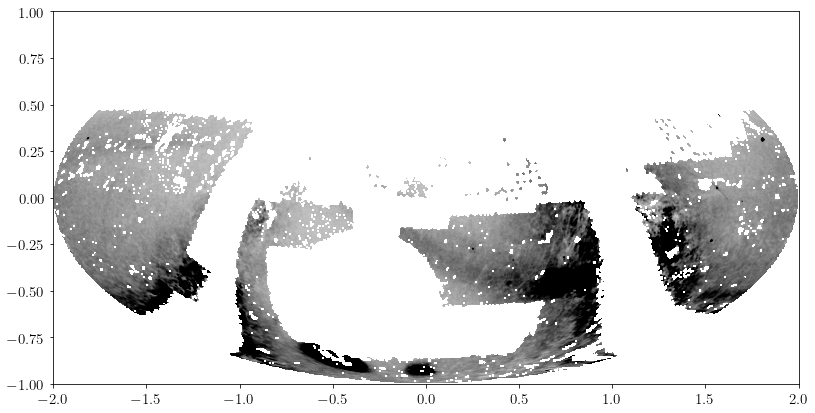

In [24]:
proj = hp.projector.MollweideProj(xsize=1024, 
                                  rot=[266.4, -28.9, 59.])
ax, im = plot_density_healpy.plot_proj(proj, data_delve, vmin=-5, vmax=12)

proj = plot_density_healpy.get_mollweide_proj(ends=[[5,5],[15,5]])
ax, im = plot_density_healpy.plot_proj(proj, data_delve, vmin=-5, vmax=12)

# proj = plot_density_healpy.get_ortho_proj(ends=[[5,-5],[15,-5]], half_sky=False)
# ax, im = plot_density_healpy.plot_proj(proj, data_delve, vmin=-5, vmax=12)
# plot_density_healpy.plot_stream_footprints(ax, proj, 16.9, dmu=5.0)


10.0 -5.019001817489642 0.0032618478058067187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


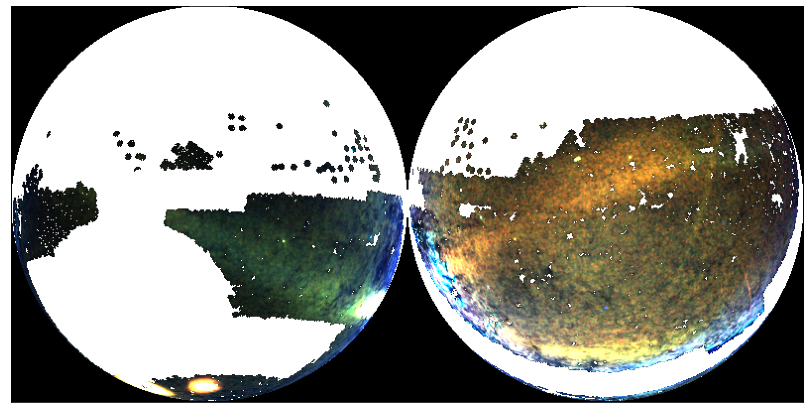

In [25]:
rgb = rgb_delve

# proj = hp.projector.MollweideProj() 
# proj = plot_density_healpy.get_ortho_proj(ends=[[20,-35],[15,-35]], half_sky=False)
# proj = hp.projector.MollweideProj(xsize=1024, 
#                                   rot=[266.4, -28.9, 59.])
# proj = hp.projector.MollweideProj(rot=rots['sag']) 
# proj = hp.projector.MollweideProj(rot=[0, 90, 0], xsize=1024)
proj = plot_density_healpy.get_ortho_proj(ends=[[5,-5],[15,-5]], half_sky=False)
# proj = hp.projector.OrthographicProj(xsize=1024, rot=[0, 0, 0])

nside = hp.get_nside(hpxcube_delve1[:,0])
func = lambda x, y, z: hp.vec2pix(nside, x, y, z)
img = np.stack([proj.projmap(rgb[i].filled(), func) for i in range(3)], axis=-1)

# img[~np.isfinite(img)] = 0

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# ax.imshow(img, origin='bottom', extent=proj.get_extent())
ax.imshow(img, origin='lower', extent=proj.get_extent())
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()
# plt.savefig('/Users/nora/Desktop/DES_Y6_GOLD_FoS_bkg.png', bbox_inches='tight')

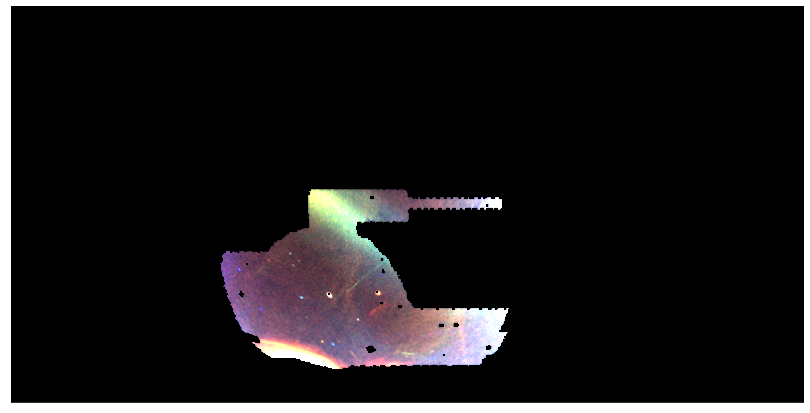

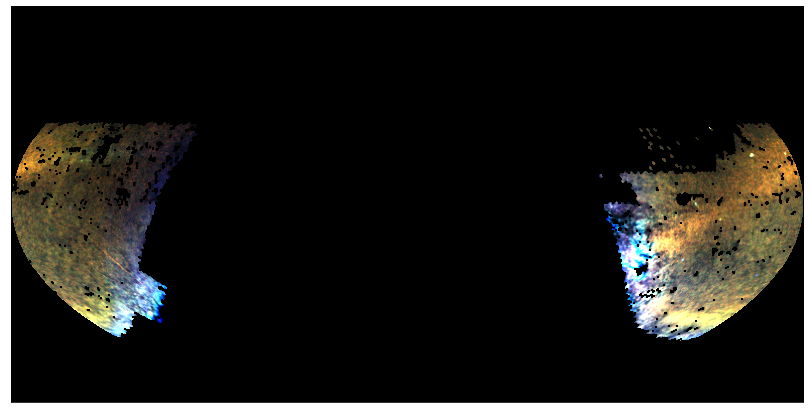

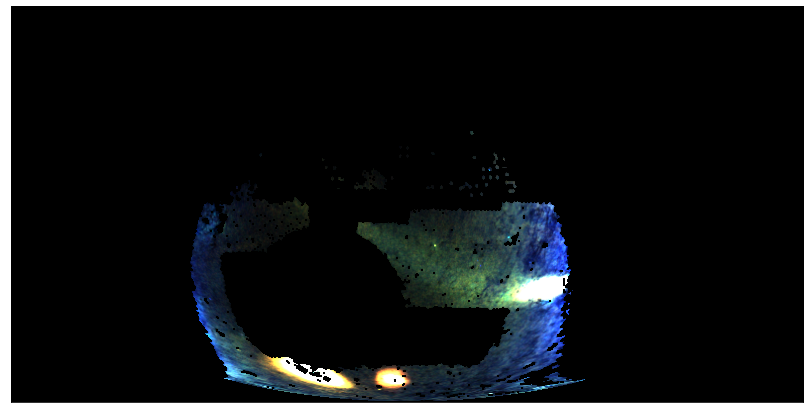

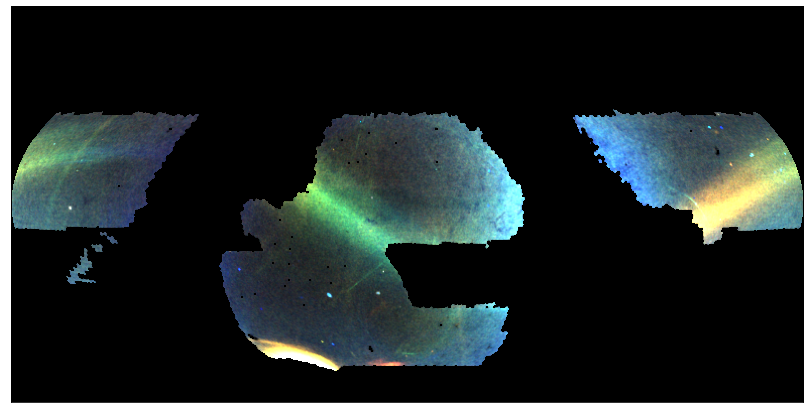

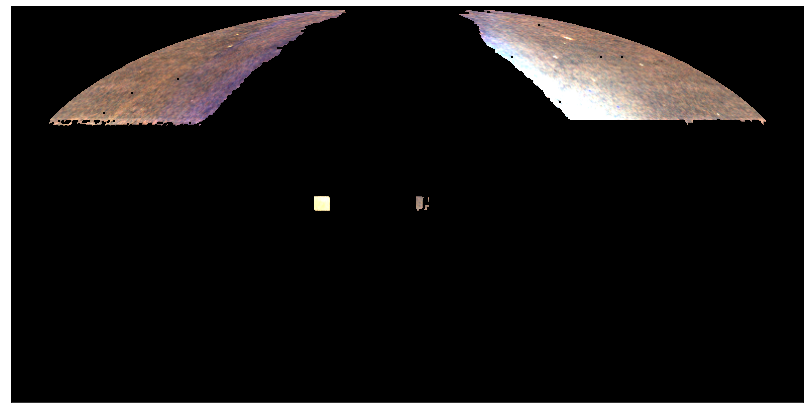

In [26]:
for rgb in [rgb_des, rgb_delve1, rgb_delve2, rgb_decals, rgb_bass]:
    proj = hp.projector.MollweideProj() 
    img = np.stack([proj.projmap(rgb[i].filled(), func) 
                    for i in range(3)], axis=-1)
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.imshow(img, origin='lower', extent=proj.get_extent())
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    fig.tight_layout()

In [27]:
def ang2disc(nside, lon, lat, radius, inclusive=False, fact=4, nest=False):
    """
    Wrap `query_disc` to use lon, lat, and radius in degrees.
    """
    vec = hp.ang2vec(lon, lat, lonlat=True)
    return hp.query_disc(nside, vec, np.radians(radius), inclusive, fact, nest)
def mask_lmc(nside=512):
    # from skymap.constants import RA_LMC, DEC_LMC, RADIUS_LMC
    RA_LMC, DEC_LMC = 80.8937500, -69.7561111
    RADIUS_LMC = 5
    mask = np.zeros(hp.nside2npix(nside), dtype=bool)
    mask[ang2disc(nside, RA_LMC, DEC_LMC, 3 * RADIUS_LMC)] = True
    return mask
def mask_smc(nside=512):
    # from skymap.constants import RA_LMC, DEC_LMC, RADIUS_LMC
    RA_LMC, DEC_LMC = 13.1583333,-72.8002778
    RADIUS_LMC = 2
    mask = np.zeros(hp.nside2npix(nside), dtype=bool)
    mask[ang2disc(nside, RA_LMC, DEC_LMC, 3 * RADIUS_LMC)] = True
    return mask
def mask_sgr(nside=512):
    import gala.coordinates as gccoord
    pix=np.arange(hp.nside2npix(512))
    ang=hp.pix2ang(512,pix,lonlat=True)
    ang[0][ang[0] >180]-=360
    sgr_c=SkyCoord(ra=ang[0]*u.deg, dec=ang[1]*u.deg, frame="icrs").transform_to(gccoord.SagittariusLaw10())
    sgrmask=abs(sgr_c.Beta.deg) < 6
    return sgrmask
def mask_milky_way(nside=512):
    pix=np.arange(hp.nside2npix(512))
    ang=hp.pix2ang(512,pix,lonlat=True)
    ang[0][ang[0] >180]-=360
    mw_c=SkyCoord(ra=ang[0]*u.deg, dec=ang[1]*u.deg, frame="icrs").transform_to("galactic")
    mwmask=abs(mw_c.b.deg) < 15
    return mwmask


lmcmask=mask_lmc()
smcmask=mask_smc()
sgrmask=mask_sgr()
mwmask=mask_milky_way()

##########################################################

from ugali.utils.stats import peak, kde, peak_interval
objmask = sgrmask | lmcmask | smcmask | mwmask
def create_rgb_stack(data_stack_masked, scale_factor=3):
    
    slices = [(26, 50),
              (15, 26),
              (0, 15)]
    stacks = [np.sum(data_stack_masked[:, x:y], axis=1) / (y - x) for x, y in slices]
    for s in stacks:
        s.fill_value = np.nan

    rgb = stacks
    for i in range(3):
        X = stacks[i]
        #calculate 
        peaki=peak_interval(rgb[i][rgb[i].filled()>0 & ~objmask].filled())
        center=peaki[0]
        scale=(peaki[1][1]-peaki[1][0])
        rgb[i] = rgb[i]-center
        rgb[i] = rgb[i]/(scale_factor*scale)
        #rgb[i] = apwnorm(rgb[i], min=np.percentile(rgb[i], 1), max=np.percentile(rgb[i], 99))
        rgb[i][X == 0] = 0.
    return rgb

In [28]:
data_stack_masked = np.ma.copy(data_des)

In [29]:
slices = [(26, 50),
          (15, 26),
          (0, 15)]
stacks = [np.sum(data_stack_masked[:, x:y], axis=1) / (y - x) for x, y in slices]
for s in stacks:
    s.fill_value = np.nan

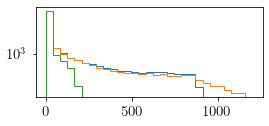

In [30]:
plt.figure(figsize=(4,2))
plt.hist(stacks[0], bins=np.linspace(1,1200,30), histtype='step')
plt.hist(stacks[1], bins=np.linspace(1,1200,30), histtype='step')
plt.hist(stacks[2], bins=np.linspace(1,1200,30), histtype='step')
plt.yscale('log')
plt.show()

In [31]:
rgb[i][rgb[i].filled()>0 & ~objmask].filled().min()

0.017318405975021885

In [32]:
rgb = stacks
for i in range(3):
    peaki=peak_interval(rgb[i][rgb[i].filled()>0 & ~objmask].filled())
    center=peaki[0]
    scale=(peaki[1][1]-peaki[1][0])

    X = stacks[i]
    rgb[i] = rgb[i]-center
    rgb[i] = rgb[i]/(2*scale)
    #rgb[i] = apwnorm(rgb[i], min=np.percentile(rgb[i], 1), max=np.percentile(rgb[i], 99))
    rgb[i][X == 0] = 0.

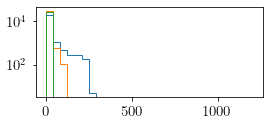

In [33]:
plt.figure(figsize=(4,2))
plt.hist(rgb[0], bins=np.linspace(1,1200,30), histtype='step')
plt.hist(rgb[1], bins=np.linspace(1,1200,30), histtype='step')
plt.hist(rgb[2], bins=np.linspace(1,1200,30), histtype='step')
plt.yscale('log')
plt.show()

In [34]:
# # STACK RGB
# rgb_merged = np.ma.copy(rgb_des)
# for i in range(3):
#     rgb_merged[i][~data_bass[:,10].mask] = rgb_bass[i][~data_bass[:,10].mask]
#     rgb_merged[i][~data_delve1[:,10].mask] = rgb_delve1[i][~data_delve1[:,10].mask] 
#     rgb_merged[i][~data_delve2[:,10].mask] = rgb_delve2[i][~data_delve2[:,10].mask] 
#     rgb_merged[i][~data_decals[:,10].mask] = rgb_decals[i][~data_decals[:,10].mask]
#     rgb_merged[i][~data_des[:,10].mask] = rgb_des[i][~data_des[:,10].mask] 

In [35]:
objmask.shape, data_merged.shape, data_delve1.shape

((3145728,), (3145728,), (3145728, 50))

In [36]:
data_delve1.shape, objmask.shape

((3145728, 50), (3145728,))

In [37]:
mask = np.vstack([objmask]*data_delve1.shape[1]).T
dma = np.ma.array(data_delve1, mask=mask)

In [38]:
data_merged10 = np.copy(data_merged)

In [39]:
data_merged = np.zeros_like(data_des)
data_merged[~data_bass.mask] = data_bass[~data_bass.mask]
data_merged[~data_delve1.mask] = data_delve1[~data_delve1.mask] 
data_merged[~data_delve2.mask] = data_delve2[~data_delve2.mask] 
data_merged[~data_decals.mask] = data_decals[~data_decals.mask]
data_merged[~data_des.mask] = data_des[~data_des.mask] 

In [40]:
print(data_merged.shape)
print(np.all(data_merged[:,10] == data_merged10))

(3145728, 50)
True


In [41]:
mask = np.vstack([objmask]*data_merged.shape[1]).T
data_merged_ma = np.ma.array(np.ma.getdata(data_merged), mask=mask)

In [42]:
rgb_stack = create_rgb_stack(data_merged) # masking is in function

In [43]:
rgb_stacks = []
for data in [data_bass, data_delve1, data_delve2, data_decals, data_des]:
    rgb_stacks.append(create_rgb_stack(data, scale_factor=2.5))

In [44]:
len(rgb_stacks)

5

In [45]:
rgb_merged = np.ma.copy(rgb_stacks[0])
for rgb in rgb_stacks:
    for i in range(3):
        rgb_merged[i][~rgb[i].mask] = rgb[i][~rgb[i].mask]
rgb_merged.mask = rgb_merged == 0

In [46]:
# # STACK RGB
# rgb_merged = np.ma.copy(rgb_des)
# for i in range(3):
#     rgb_merged[i][~data_bass[:,10].mask] = rgb_bass[i][~data_bass[:,10].mask]
#     rgb_merged[i][~data_delve1[:,10].mask] = rgb_delve1[i][~data_delve1[:,10].mask] 
#     rgb_merged[i][~data_delve2[:,10].mask] = rgb_delve2[i][~data_delve2[:,10].mask] 
#     rgb_merged[i][~data_decals[:,10].mask] = rgb_decals[i][~data_decals[:,10].mask]
#     rgb_merged[i][~data_des[:,10].mask] = rgb_des[i][~data_des[:,10].mask] 

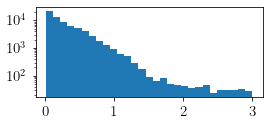

In [47]:
img = np.stack([proj.projmap(rgb[i].filled(), func) for i in range(3)], axis=-1)
plt.figure(figsize=(4,2))
plt.hist(img.flatten(), bins=np.linspace(0.01, 3, 30))
plt.yscale('log')
plt.show()

In [48]:
img.astype(np.uint8).min()

0

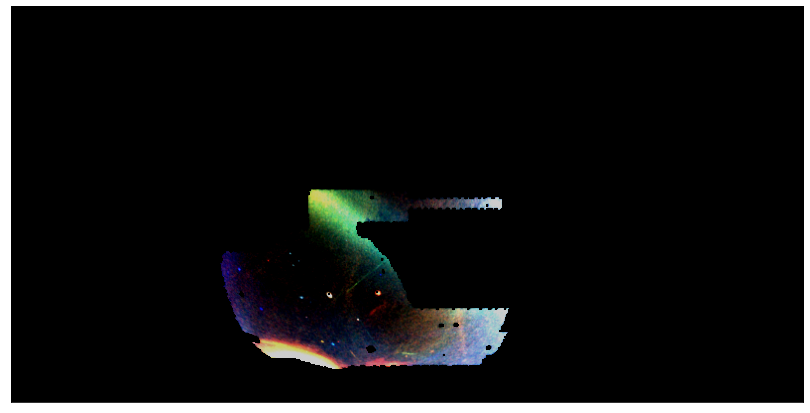

In [52]:
rgb = rgb_stacks[-1]
img = np.stack([proj.projmap(rgb[i].filled(), func) for i in range(3)], axis=-1)
img = np.clip(img, 0., 0.8)
# img[~np.isfinite(img)] = 0
# for i in range(3):
#     img[:,:,i] /= (img[:,:,i].max() - img[:,:,i].min())
# print(img.max(), img.min())

###
proj = hp.projector.MollweideProj() 
# proj = plot_density_healpy.get_ortho_proj(ends=[[5,-25],[15,-25]], half_sky=False)
# proj = hp.projector.MollweideProj(xsize=1024, 
#                                   rot=[266.4, -28.9, 59.])
# proj = hp.projector.MollweideProj(rot=rots['sag']) 
# proj = hp.projector.MollweideProj(rot=[0, 90, 0], xsize=1024)
# proj = plot_density_healpy.get_ortho_proj(ends=[[5,-5],[15,-5]], half_sky=False)
# proj = hp.projector.OrthographicProj(xsize=1024, rot=[0, 0, 0])

###
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# ax.imshow(img, origin='bottom', extent=proj.get_extent())
ax.imshow(img, origin='lower', extent=proj.get_extent())
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()

In [223]:
img[:,:,0][np.isfinite(img[:,:,0])].min(), img[:,:,0][np.isfinite(img[:,:,0])].max()

(-0.6356460928518988, 268.7543071134789)

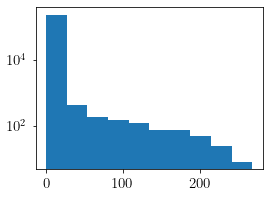

In [225]:
plt.figure(figsize=(4,3))
plt.hist(img[:,:,0][np.isfinite(img[:,:,0])].flatten()) # , bins=np.linspace(-1,250,30)
plt.yscale('log')
plt.show()

In [165]:
img[np.isfinite(img)].min(), img.max()

(-0.5297050773765822, 223.96192259456575)

In [37]:
# import sys
# sys.path.append('/Users/nora/code')
# from slegs import stream_helpers

In [38]:
# cube, distmods, footprint = stream_helpers.data.get_data(
#     '../data/2021/BASS_DR9_iso_hpxcube_z0.0001_a12.0_gmax23.0_gmin16.fits.gz', 
#     '../data/2021/DECaLS_DR9_iso_hpxcube_z0.0001_a12.0_gmax23.0_gmin16.fits.gz',
#     '../data/2021/DELVE_R1_iso_hpxcube_z0.0001_a12.0_gmax23.0_gmin16.fits.gz',
#     '../data/2021/DELVE_R2_iso_hpxcube_z0.0001_a12.0_gmax23.0_gmin16.fits.gz',
#     '../data/2021/DES_Y6_GOLD_iso_hpxcube_z0.0001_a12.0_gmax23.0_gmin16.fits.gz',
#     stitch=True)

In [39]:
# proj = plot_density_healpy.get_ortho_proj(ends=[[30,-35],[15,-35]], half_sky=True)

# # data = np.ma.copy(data_des241)
# for i in range(data_des240.shape[1]):
# # for i in [10]:
# #     vmin = -2
# #     data[data == 0] = vmin
#     ax, im = plot_density_healpy.plot_proj(proj, data_des241[:,i], vmin=-2, vmax=2)
#     ax.xaxis.set_visible(False)
#     ax.yaxis.set_visible(False)
#     fig.tight_layout()
#     plt.savefig('../plots/DES_Y6_GOLD/bkg/des_y6_%.1f.png' %modulus[i])